In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import math

df = pd.read_csv("candy_production.csv")
display(df.info())      # Data có 548 dòng, 2 biến, Null = 0
display(df.head())
display(df.tail())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  548 non-null    object 
 1   IPG3113N          548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


None

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613


,IPG3113N
count,548.000000
mean,100.662524
std,18.052931
min,50.668900
25%,87.862475
50%,102.278550
75%,114.691900
max,139.915300


In [2]:
# observation_date cần chuyển sang kiểu datetime để làm time series
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Đặt cột ngày làm index
df = df.set_index('observation_date')

# Kiểm tra lại
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1972-01-01 to 2017-08-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB
None
                  IPG3113N
observation_date          
1972-01-01         85.6945
1972-02-01         71.8200
1972-03-01         66.0229
1972-04-01         64.5645
1972-05-01         65.0100


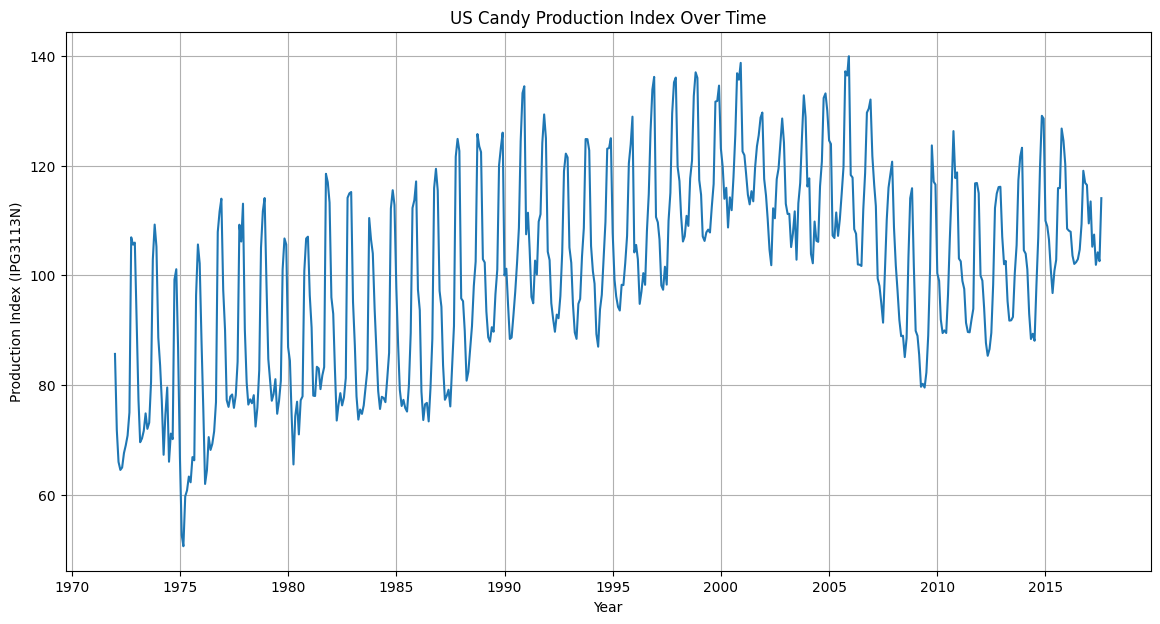

In [3]:
# # Convert observation_date to datetime and set as index
# df['observation_date'] = pd.to_datetime(df['observation_date'])
# df.set_index('observation_date', inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df['IPG3113N'])
plt.title("US Candy Production Index Over Time")
plt.xlabel("Year")
plt.ylabel("Production Index (IPG3113N)")
plt.grid(True)
plt.show()

In [4]:
# Tính rolling mean và rolling std với window=12
rolling_mean = df['IPG3113N'].rolling(window=12).mean()
rolling_std = df['IPG3113N'].rolling(window=12).std()

# Tính rolling Z-score
rolling_z_scores = (df['IPG3113N'] - rolling_mean) / rolling_std

# Xác định anomaly (ngưỡng |Z| > 3)
anomalies = df[(rolling_z_scores > 3) | (rolling_z_scores < -3)]

# In ra kết quả
print("Số lượng điểm bất thường:", len(anomalies))
print(anomalies)

Số lượng điểm bất thường: 0
Empty DataFrame
Columns: [IPG3113N]
Index: []


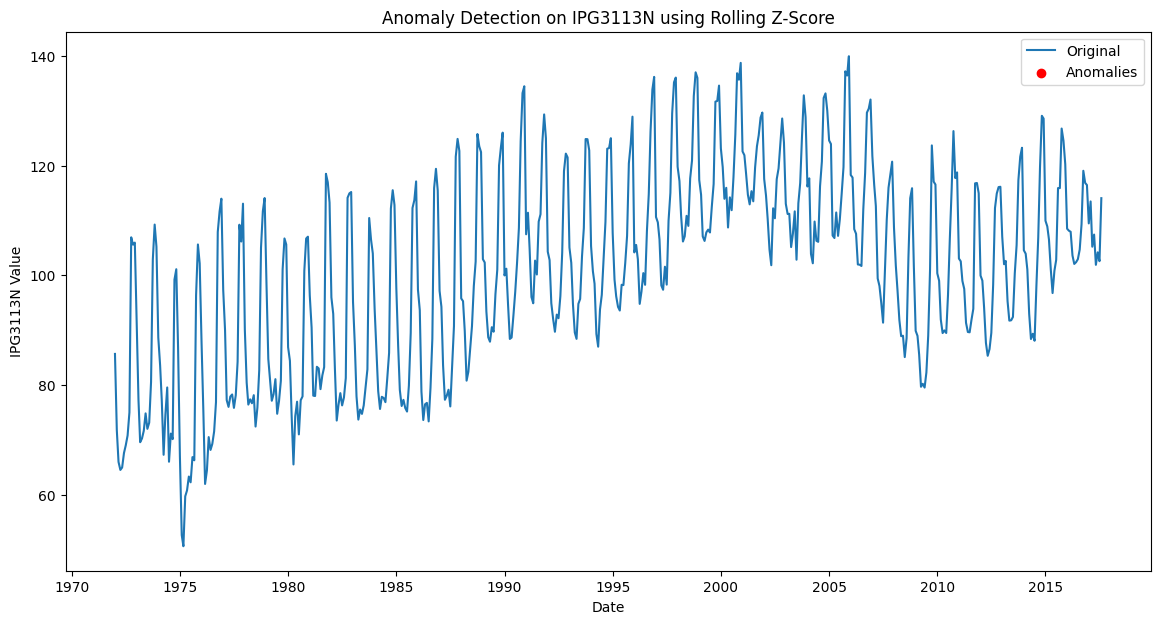

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df.index, df['IPG3113N'], label='Original')

# Vẽ scatter anomaly
plt.scatter(anomalies.index, anomalies['IPG3113N'], color='r', label='Anomalies')

plt.legend()
plt.title("Anomaly Detection on IPG3113N using Rolling Z-Score")
plt.xlabel("Date")
plt.ylabel("IPG3113N Value")
plt.show()

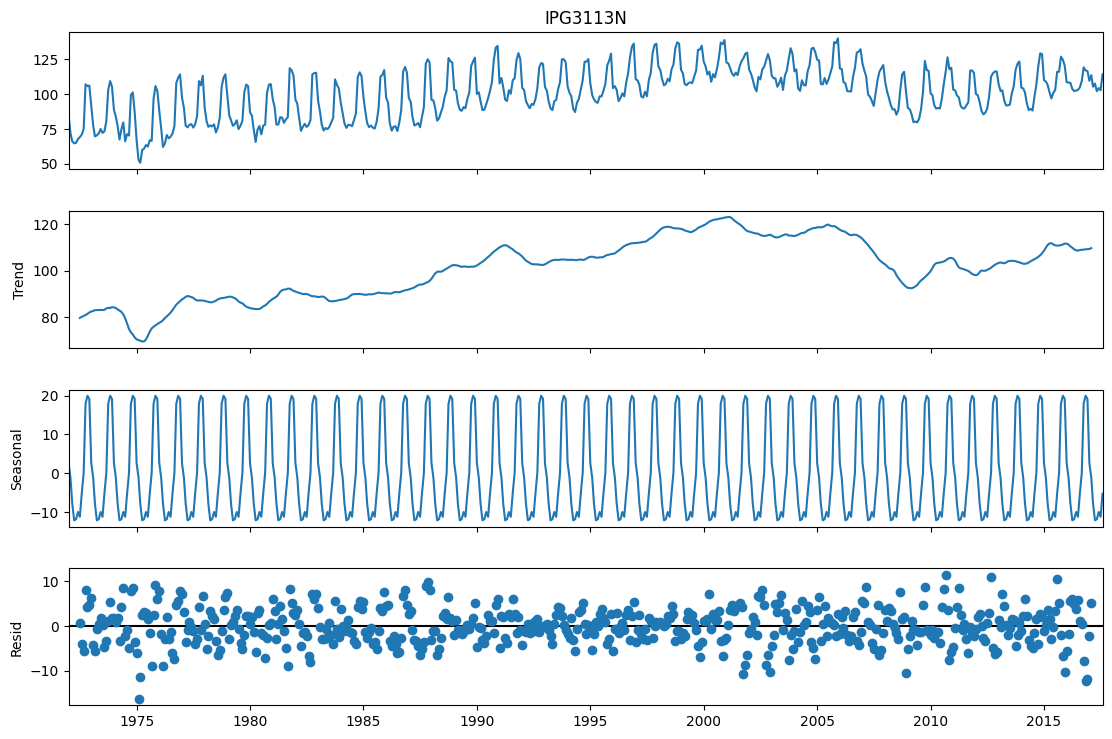

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['IPG3113N'], model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Nhận xét từ biểu đồ decomposition:
# Trend: tăng mạnh từ 1975 - 2002, sau đó giảm nhẹ rồi đi ngang --> DỰ BÁO >= 1975
# Seasonality: lặp theo chu kỳ 12 tháng 
# Residual: dao động nhỏ, không có pattern rõ rệt, phù hợp để dự báo ARIMA/SARIMA